## Генерация выборки из заданного распределения

### Задача 1
Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.


In [11]:
import time
import numpy as np
import matplotlib.pyplot as plt


1) Неупорядоченные веса

In [117]:
w=np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
w=w/w.sum()
w=w.cumsum()
sample1=[]
t1=time.time()
random = np.random.rand(1000)
for i in range(1000):
    for j in range(10):
        if random[i]<w[j]:
            sample1.append(j)
            break
t2=time.time()
print('Затраченное время -',t2-t1, 'секунд')
            

Затраченное время - 0.0020003318786621094 секунд


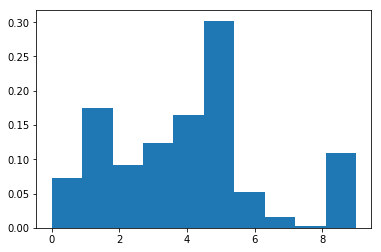

In [119]:
plt.hist(sample1, density = True)
plt.show()

2) Упорядоченные веса

In [112]:
w=np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
w=w/w.sum()
n=np.argsort(w)[::-1]
w=np.sort(w)[::-1]
w=w.cumsum()
sample2=[]
t1=time.time()
random = np.random.rand(1000)
for i in range(1000):
    for j in range(10):
        if random[i]<w[j]:
            sample2.append(n[j])
            break
t2=time.time()
print('Затраченное время -',t2-t1, 'секунд')

Затраченное время - 0.001999378204345703 секунд


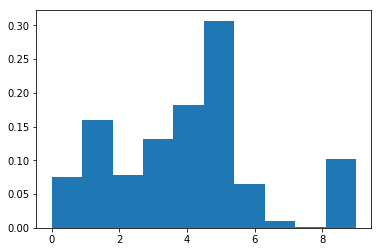

In [118]:
plt.hist(sample2, density = True)
plt.show()

### Задача 2
Смоделируйте выборку размера 1000 из распределения $Exp(\lambda)$. Постройте выборочную гистограмму и точный график плотности распределения.

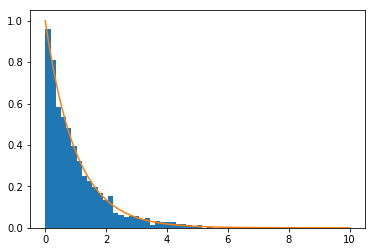

In [131]:
lambda_ = 1
sample = np.random.uniform(0,1,1000)
sample = -np.log(1-sample)/lambda_
x = np.linspace(0,10,1000)
plt.hist(sample, bins=50,density=True)
plt.plot(x,lambda_*np.exp(-lambda_*x))
plt.show()

### Задача 3
Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

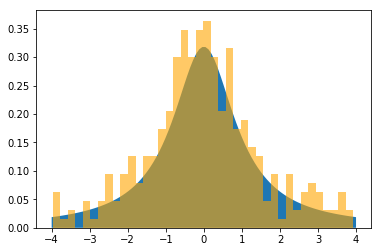

In [177]:
from scipy import stats
import numpy as np
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.fill_between(x, 0, dist.pdf(x))
x1 = np.random.uniform(-4,4,1000)
y1 = np.random.uniform(0,0.35,1000)
sample3 = x1[y1 < ((np.power(x1,2)+1)*np.pi)**(-1)]
plt.hist(sample3, bins=40, color='orange',alpha=0.6, density = True)
plt.show()

### Задача 4
Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора. 

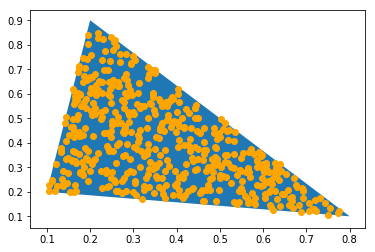

In [283]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
r1 = np.random.rand(500, 2)
s=r1.sum(axis=1)
r1 = np.where(1-r1[:,0, None]>r1[:,1, None], r1, 1-r1) #Превратили в треугольник
M=np.array([[7/np.sqrt(50),1/np.sqrt(50)],[-1/np.sqrt(50),7/np.sqrt(50)]])
r1=np.matmul(M,r1.T).T #Преобразовали в нужный нам треугольник
r1=r1*np.sqrt(50)/10+np.array([0.1,0.2])
plt.scatter(r1[:,0],r1[:,1],color='orange')
plt.show()

### Задача 5
Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

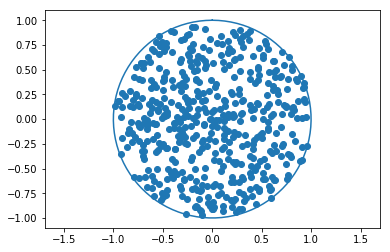

In [66]:
phi = np.random.uniform(0,2*np.pi,500)
r = np.sqrt(np.random.uniform(0,1,500)) # берем корень, так как пользуемся inverse transform method для F(r) = r^2
x = np.zeros(500)
y = np.zeros(500)
x = r*np.cos(phi)
y = r*np.sin(phi)
plt.scatter(x,y)
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

### Задача 6
Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

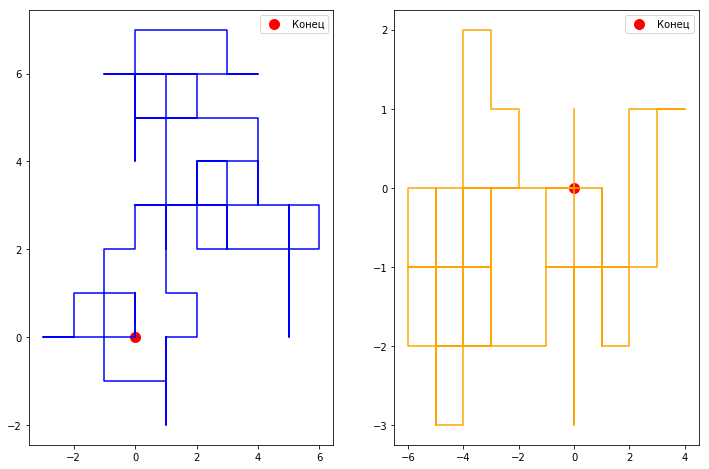

In [69]:
def r_walk(n):
    x = np.ones(n)
    y = np.ones(n)
    x[np.random.choice(range(n), n//2, replace = False)]=-1
    y[np.random.choice(range(n), n//2, replace = False)]=-1
    x=np.cumsum(x)
    y = np.cumsum(y)
    x_n = (x+y)/2 #переходим от движения по диагоналям к движению по осям
    y_n = (x-y)/2
    return x_n,y_n

x1,y1 = r_walk(100)
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.plot(x1,y1, color='blue')
plt.scatter(x1[99],y1[99],color='red',lw=5, label='Конец')
plt.legend()
x2,y2 = r_walk(100)
plt.subplot(1,2,2)
plt.plot(x2,y2,color='orange')
plt.scatter(x1[99],y1[99],color='red',lw=5, label='Конец')
plt.legend()
plt.show()

### Задача 7
Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций ```np.sin``` и ```np.cos```. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

Cумма квадратов нормальных распределений имеет экспоненциальное распределение. Так что мы можем воспользоваться второй и пятой задачей и получить выборку из независимых N(0,1) случаных величин.

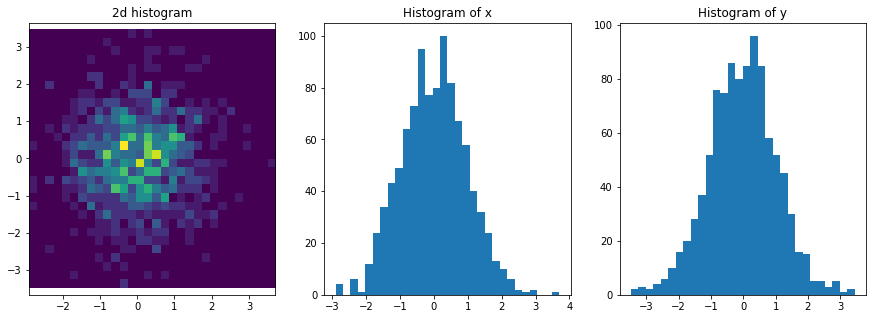

In [ ]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

Модифицированный алгоритм:

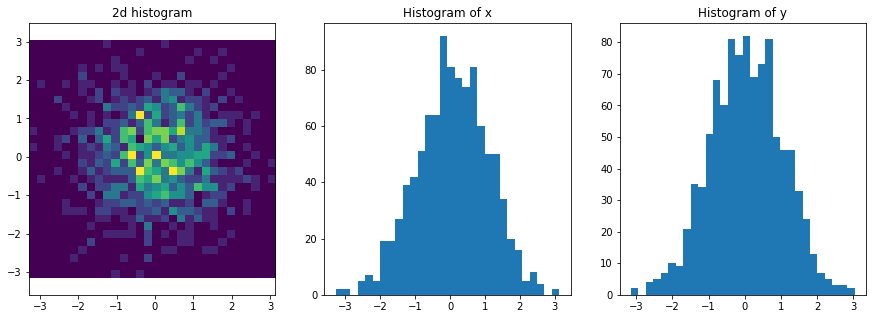

In [382]:
n = 2000
x1, y1 = np.random.rand(2, n)*2-1
r = x1*x1+y1*y1
x1=x1[r<1]
y1=y1[r<1]
r = r[r<1] #методом отбора получили  круг
x = x1*np.sqrt((-2*np.log(r))/r)
y = y1*np.sqrt((-2*np.log(r))/r)
x=x[:1000]
y=y[:1000]
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

Выборкa объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)).

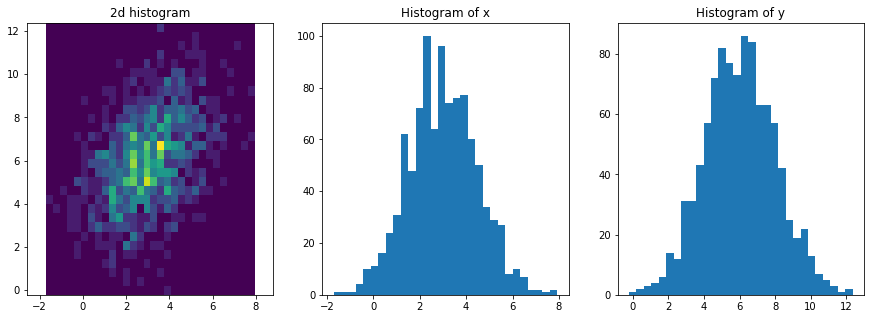

In [377]:
a = np.array([3, 6])
K = np.array([[2, 1],[1, 4]])
# найдем К^0.5
det = np.linalg.det(K)
tr = np.trace(K)
K_1_2 = ( K + np.sqrt(det) * np.diag([1, 1])) / np.sqrt((tr+2*np.sqrt(det)))
x2 = a[0] + K_1_2[0, 0] * x + K_1_2[0, 1] * y
y2 = a[1] + K_1_2[1, 0] * x + K_1_2[1, 1] * y
x2=x2[:1000]
y2=y2[:1000]
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x2, y2, bins=30)
ax[0].axis('equal')
ax[1].hist(x2, bins=30)
ax[2].hist(y2, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

### Задача 8
Перейдите от вектора из независимых стандартных нормальных величин к гауссовскому вектору с нулевым средним и заданной ниже ковариационно матрицей. Обоснуйте теоретически и численно, что полученный вектор обладает требуемой ковариационной матрицей.


In [378]:
B = np.array([[ 2.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.],
              [ 0.,  4.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
              [ 0.,  0.,  4.,  0.,  0.,  0., -1.,  0.,  0.],
              [ 0., -1.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
              [-1.,  0.,  0.,  0.,  2.,  0.,  0.,  0., -1.],
              [ 0.,  0.,  0.,  0.,  0.,  4.,  0., -1.,  0.],
              [ 0.,  0., -1.,  0.,  0.,  0.,  4.,  0.,  0.],
              [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  4.,  0.],
              [-1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  2.]])
#Заметим, что последняя строка является суммой 1 и 5, умноженной на -1
B = np.linalg.cholesky(B[:8,:8])
B_last = (B[0:1] + B[4:5])*(-1)
B = np.concatenate((B, B_last), axis = 0)
B_1_2 = np.concatenate((B, np.zeros((9,1))), axis = 1)
np.matmul(B_1_2,B_1_2.T)

array([[ 2.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.],
       [ 0.,  4.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  4.,  0.,  0.,  0., -1.,  0.,  0.],
       [ 0., -1.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0.,  2.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  4.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.,  0.,  0.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  4.,  0.],
       [-1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  2.]])

Докажем численно

In [386]:
n = 10000000
x1, y1 = np.random.rand(2, n)*2-1
r = x1*x1+y1*y1
x1=x1[r<1]
y1=y1[r<1]
r = r[r<1] #методом отбора получили  круг
x = x1*np.sqrt((-2*np.log(r))/r)
y = y1*np.sqrt((-2*np.log(r))/r)
x=x[:5000000]
y=y[:5000000]
N=x
for i in range(4):
    x1, y1 = np.random.rand(2, n)*2-1
    r = x1*x1+y1*y1
    x1=x1[r<1]
    y1=y1[r<1]
    r = r[r<1] #методом отбора получили  круг
    x = x1*np.sqrt((-2*np.log(r))/r)
    y = y1*np.sqrt((-2*np.log(r))/r)
    x=x[:5000000]
    y=y[:5000000]
    N=np.vstack((N,x, y))
N=np.matmul(A,N).T
D=np.empty(0,dtype=float)
for i in range(9):
    for k in range(9): # Посчитаем ковариации по формуле
        D = np.append(D, ((N[:,i]-(N[:,i].mean()))*(N[:,k]-(N[:,k].mean()))).mean())
D=D.reshape(9,9)        
print(D)

[[ 1.99897812e+00  1.46587131e-04  2.25529464e-03 -1.05100254e-03
  -9.98368699e-01  6.44866344e-04  7.27134428e-05 -1.92148912e-04
  -1.00060942e+00]
 [ 1.46587131e-04  3.99777789e+00 -9.51784388e-04 -1.00169375e+00
   1.35781337e-05 -5.80865564e-04  5.64906080e-04  8.53494037e-04
  -1.60165265e-04]
 [ 2.25529464e-03 -9.51784388e-04  4.00376071e+00 -3.82910726e-04
  -7.54497270e-04 -1.14399571e-03 -9.98999070e-01 -3.51485710e-04
  -1.50079737e-03]
 [-1.05100254e-03 -1.00169375e+00 -3.82910726e-04  4.00278182e+00
   6.59005674e-04 -1.85311339e-03  1.06882313e-03  6.62627003e-05
   3.91996866e-04]
 [-9.98368699e-01  1.35781337e-05 -7.54497270e-04  6.59005674e-04
   1.99771187e+00 -2.37712346e-03  1.41053453e-03  1.17873019e-03
  -9.99343168e-01]
 [ 6.44866344e-04 -5.80865564e-04 -1.14399571e-03 -1.85311339e-03
  -2.37712346e-03  4.00029260e+00  5.83751703e-04 -1.00231081e+00
   1.73225712e-03]
 [ 7.27134428e-05  5.64906080e-04 -9.98999070e-01  1.06882313e-03
   1.41053453e-03  5.8375170

### Задача 9
С помощью метода Монте-Карло (бросанием случайной точки в квадрат) оцените число $\pi$. Теоретически обоснуйте необходимое число бросаний, чтобы оценить число $\pi$ с точностью 3 знака после запятой и достоверностью 99%. С помощью метода Монте-Карло оцените, сколько на практике требуется бросаний, чтобы достичь с требуемой достоверностью нужной точности.


pi=3.14159...
Обоснование: P(|Сумма от 0 до n xi * 4/n - Пи| >= 0,0004)>=1-D((Сумма от 0 до n xi * 4/n) /(0,0004)^2 по н-ву Чебышева

P(|Сумма от 0 до n xi * 4/n - Пи| >= 0,0004)<0.01 достоверность

D((Сумма от 0 до n xi * 4/n) /(0,0004)^2 < 0.99 (n/12 дисперсия распр. суммы равн. распределенных)

n/(12*n^2)*10^8<0.99
Получили, что n должно быть больше приблизительно 1220000000

In [29]:
for n in [1000000,10000000,100000000]:
    r = np.random.rand(n, 2)
    c = r[r[:, 0] ** 2 + r[:, 1] ** 2 <= 1]
    pi = 4 * len(c) / len(r)
    print(pi)
print('Требуется около 10 миллионов бросаний')

3.138204
3.1412072
3.14158812
Требуется около 10 миллионов бросаний


### Задача 10

Реализовать метод генерации случайного разбиения n-элементного множества на подмножества. С его помощью оценить ожидаемое число подмножеств в случайном разбиении множества из 100 элементов. 

Подсказка 1: Ширяев, Вероятность, т1, задача 2 к параграфу 1.

Подсказка 2: http://djalil.chafai.net/blog/2012/05/03/generating-uniform-random-partitions/

In [71]:
#функция разбиения
def split(n,s):
    b_n=0
    b_n=np.sum(np.array([i**n / (np.math.factorial(i)) for i in range(n)])) #Формула Дубински
    b_n=b_n/np.exp(1)
    p_k = np.array([i ** n / (np.math.factorial(i) * np.exp(1) * b_n) for i in range(n)]) #integer K taking the value k
    p_k = p_k / np.sum(p_k)
    p_k = np.cumsum(p_k)
    random_k = np.random.rand()
    i = 0
    for i in range(n):
        if random_k < p_k[i]:
            random_k = i
            break   
    pr = np.array([1 / random_k for j in range(random_k)])
    pr = np.cumsum(pr)
    num = np.array([np.random.rand() for j in range(n)])
    for j in range(n):
        i = 0
        for i in range(random_k):
            if  num[j] < pr[i]:
                s.append(i)
                break  
                
amount=0
for i in range(1000):
    s = []
    split(100,s)
    amount += len(np.unique(s))
amount /= 1000
print('Среднее количество подмножеств', amount)

Среднее количество подмножеств 28.617
